**Title: Bank Churn Prediction with Logistic Regression (No Oversampling)**

**Description:**
The "Bank Churn Prediction with Logistic Regression" Jupyter Notebook presents a predictive model aimed at forecasting customer churn in a bank using logistic regression. This notebook provides a detailed walkthrough of the data preprocessing, model building, evaluation, and interpretation stages, focusing on addressing class imbalance without oversampling techniques.

**Key Components:**

1. **Data Loading and Preprocessing:**
   - Load the bank churn dataset containing customer information such as age, account balance, transaction history, and churn status.
   - Preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features.

2. **Exploratory Data Analysis (EDA):**
   - Conduct exploratory data analysis to understand the distribution of features, identify patterns, and explore relationships between variables, with a focus on churn behavior.

3. **Feature Engineering:**
   - Engineer new features or transform existing ones to better capture relevant information for churn prediction, such as tenure or frequency of transactions.

4. **Model Building:**
   - Choose logistic regression as the predictive modeling algorithm, suitable for binary classification tasks like churn prediction.
   - Address class imbalance by adjusting class weights or using techniques like penalized learning.

5. **Model Training and Evaluation:**
   - Split the dataset into training and testing sets to train the logistic regression model and evaluate its performance.
   - Use evaluation metrics such as accuracy, precision, recall, and F1-score to assess the model's effectiveness in predicting churn.

6. **Interpretation and Insights:**
   - Interpret the coefficients of the logistic regression model to understand the impact of different features on the likelihood of churn.
   - Provide insights into factors influencing customer churn in the bank, such as account activity, customer demographics, and service quality.

**Note:**
This Jupyter Notebook serves as a practical guide for building a churn prediction model using logistic regression in a banking context. By focusing on addressing class imbalance without oversampling techniques, it offers a balanced approach to data analysis and modeling, suitable for real-world applications in customer retention and risk management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfba = pd.read_csv(r"Churn.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_rows",None)

In [4]:
dfba.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dfba.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dfba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
dfba = dfba.drop(["customerID"],axis=1)

In [8]:
dfba.Churn  = dfba.Churn.replace({"Yes":1,"No":0})

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
dfba[dfba.select_dtypes(include=["object"]).columns] = dfba[dfba.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [12]:
dfba.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [13]:
dfba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [14]:
#sampling 
from sklearn.model_selection import train_test_split

In [48]:
dfba_train.shape

(5282, 20)

In [15]:
dfba_train,dfba_test = train_test_split(dfba,test_size=.25)

In [16]:
dfba_train_x = dfba_train.iloc[:,0:19]
dfba_train_y = dfba_train.iloc[:,-1]

In [17]:
dfba_test_x = dfba_test.iloc[:,0:19]
dfba_test_y = dfba_test.iloc[:,-1]

In [18]:
#model building

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lo = LogisticRegression()

In [21]:
dfba_train.shape

(5282, 20)

In [22]:
lo.fit(dfba_train_x,dfba_train_y)

C:\Users\datascience\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#prediction

In [24]:
pred_tarin = lo.predict(dfba_train_x)
pred_test = lo.predict(dfba_test_x)

In [25]:
pred_test

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [26]:
np.set_printoptions(threshold=np.inf)

In [27]:
pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [28]:
#Evaluation

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
dfba_tab = confusion_matrix(dfba_test_y,pred_test)

In [31]:
dfba_tab

array([[1152,  165],
       [ 215,  229]], dtype=int64)

In [32]:
#2.accuracy
dfba_tab.diagonal().sum()*100/dfba_tab.sum()

78.4213515048268

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(dfba_test_y,pred_test)*100

78.4213515048268

In [34]:
#3 recall/tpr
from sklearn.metrics import recall_score
recall_score(dfba_test_y,pred_test)*100

51.57657657657657

In [35]:
#precision
from sklearn.metrics import precision_score
precision_score(dfba_test_y,pred_test)*100

58.121827411167516

In [36]:
#fi score
from sklearn.metrics import f1_score
f1_score(dfba_test_y,pred_test)*100

54.65393794749402

In [37]:
pred_prob = lo.predict_proba(dfba_test_x)

In [38]:
pred_prob

array([[0.79094156, 0.20905844],
       [0.34183577, 0.65816423],
       [0.60507771, 0.39492229],
       [0.98750416, 0.01249584],
       [0.9936282 , 0.0063718 ],
       [0.51852491, 0.48147509],
       [0.54830432, 0.45169568],
       [0.91307793, 0.08692207],
       [0.2953225 , 0.7046775 ],
       [0.99259686, 0.00740314],
       [0.64922598, 0.35077402],
       [0.95384796, 0.04615204],
       [0.70466802, 0.29533198],
       [0.98817684, 0.01182316],
       [0.60236059, 0.39763941],
       [0.92335567, 0.07664433],
       [0.96575255, 0.03424745],
       [0.8130604 , 0.1869396 ],
       [0.99280953, 0.00719047],
       [0.99257963, 0.00742037],
       [0.82181471, 0.17818529],
       [0.96773128, 0.03226872],
       [0.81139299, 0.18860701],
       [0.81248198, 0.18751802],
       [0.79652751, 0.20347249],
       [0.97068325, 0.02931675],
       [0.95544728, 0.04455272],
       [0.34281645, 0.65718355],
       [0.99224597, 0.00775403],
       [0.95759506, 0.04240494],
       [0.

In [39]:
#auroc curve

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [41]:
auroc = roc_auc_score(dfba_test_y,pred_test)*100

In [42]:
auroc

69.52405138623817

In [43]:
pred_prob[:,1]

array([0.20905844, 0.65816423, 0.39492229, 0.01249584, 0.0063718 ,
       0.48147509, 0.45169568, 0.08692207, 0.7046775 , 0.00740314,
       0.35077402, 0.04615204, 0.29533198, 0.01182316, 0.39763941,
       0.07664433, 0.03424745, 0.1869396 , 0.00719047, 0.00742037,
       0.17818529, 0.03226872, 0.18860701, 0.18751802, 0.20347249,
       0.02931675, 0.04455272, 0.65718355, 0.00775403, 0.04240494,
       0.0562947 , 0.07010349, 0.02630132, 0.21687625, 0.12006841,
       0.81956098, 0.39092721, 0.20208217, 0.43207296, 0.03070341,
       0.01727244, 0.01041274, 0.22400858, 0.7118617 , 0.01681338,
       0.08118718, 0.0052764 , 0.06630298, 0.55095094, 0.26043985,
       0.60946212, 0.60309325, 0.00693102, 0.65642309, 0.75869549,
       0.19070073, 0.0712684 , 0.25466238, 0.08058847, 0.70736003,
       0.0312728 , 0.11924168, 0.17564084, 0.09558114, 0.19896541,
       0.24779367, 0.02045772, 0.14676655, 0.18811231, 0.02018768,
       0.61992153, 0.06877617, 0.36014309, 0.51883908, 0.43059

In [44]:
fpr,tpr,theoratical = roc_curve(dfba_test_y,pred_prob[:,1])

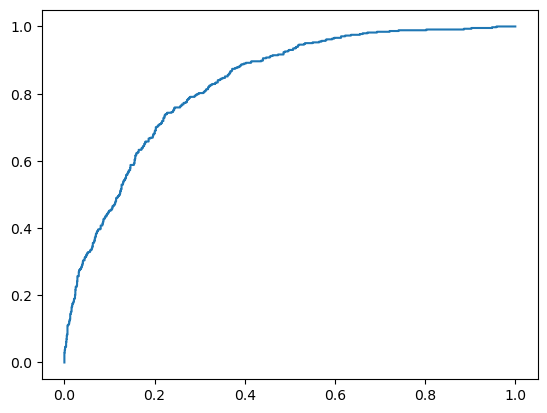

In [45]:
plt.plot(fpr,tpr)

Text(0.5, 0.5, 'auroc is 69.52405138623817')

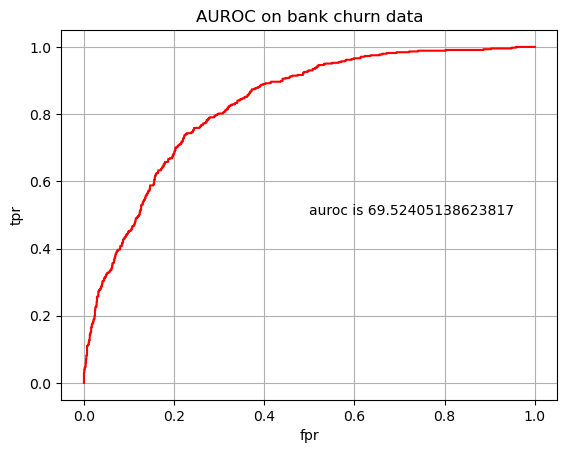

In [46]:
plt.plot(fpr,tpr,color="r")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("AUROC on bank churn data")
plt.grid()
plt.text(x=.5,y=.5,s=f"auroc is {auroc}")

In [47]:
#due to class imbalancing we have to do over sampling